In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import inv, solve, lstsq
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D 


%matplotlib inline

In [55]:
## Diffusion Coefficients:

T = -2 ## experimental temperature (deg C)

Ds = 9.1E-4*np.exp(-(7.2E3)/(T+273.15)) 
    ## from Rempel and Wettlaufer: average of measured diffusion parameters reported by Ramseier (1967) 
    ## solid state diffusion for ice (m^2/s)

Dl = 1.728E-8 - 1.575E-10*(T+273.15) + 3.591E-13*(T+273.15)**2 
    ## from Rempel and Wettlaufer: experimental data by Gillen and others (1972) 
    ## super cooled water diffusivity (m^2/s)


days = 21.0
time = days*24.0*60.0*60.0        ##  (s)  total time of experiment 
m = 350.0/1000.0                  ##  (kg) total mass loss
r = 7.62/100.0                    ##  (m)  radius of tube
A = np.pi*r**2                    ##  (m^2)  cross-sectional area 
dz = 0.2/100.0                    ##  (m)

rho = 917.0                       ##  (kg/m^3)  ice density 
M = 18.01488/1000.0               ##  (kg/mol)  molar mass of H20

s = m/time                        ##  (kg/s) sublimation rate
sub = 1.01*(m/(time*A))*(1.0/M)*2.0    ##  (mols/m^2*s) sublimation flux of total hydrogen (H+D) 


R_std = 1.5575E-4                 ##  (ratio)  D/H standard
alpha = 1.12                      ##  (ratio)  fractionation factor: ice --> vapor 

deltaD_0 = -60.0                  ##  (0/00)  initial delta D in parts per thousand 

R_ice_0 = deltaD_0/1000.0*R_std + R_std          ## (ratio)  D/H of ice at t = 0
perD_0_ice = R_ice_0/(R_ice_0 + 1.0)             ## (ratio) D/(D+H) of ice at t = 0


c_tot = rho*(1.0/M)*2.0           ##  (mols/m^3)  mols of total hydrogen (D+H) in 1 m^3 of ice
h_new = dz - s*dt*(1.0/rho)*(1.0/A)         
                                  ##  (m) height of z = 0 disk after sublimation

c0 = c_tot*perD_0_ice             ##  (mols/m^3) initial concentration
print c0

14.902539735


In [56]:
dt = 60.0                         ##  (s) time step- 60 seconds 
dz = 0.2/100.0                    ##  (m)
nz = 100


deltaD_0 = -60.0                  ##  (0/00)  initial delta D in parts per thousand 
R_ice_0 = deltaD_0/1000.0*R_std + R_std          ## (ratio)  D/H of ice at t = 0
perD_0_ice = R_ice_0/(R_ice_0 + 1.0)             ## (ratio) D/(D+H) of ice at t = 0
c_tot = rho*(1.0/M)*2.0           ##  (mols/m^3)  mols of total hydrogen (D+H) in 1 m^3 of ice
c0 = c_tot*perD_0_ice             ##  (mols/m^3) initial concentration


c = np.zeros(nz)
cn = np.zeros(nz)
c = c + c0
c_0 = []
deltaD = []

D = Dl
nt = np.int(time/dt + 1.0)
for n in range(nt):
    c_0.append(c[0])
    
    ## Sublimation Fulx
    R_ice = (c[0]/c_tot)/(1.0 - (c[0]/c_tot))
    delta = (R_ice - R_std)/R_std*1000.0
    deltaD.append(delta)
    R_vap = R_ice/alpha
    sub_flux = R_vap/(R_vap + 1.0)*sub
               ## (mols/m^2*s) 

        
    c0n = c[0]*dz/h_new - sub_flux*dt/h_new
    
    ## Diffusive Flux
    F = -D*(c[1] - c0n)/h_new
        
    ## Boundary Conditions
    c[0] = c[0]*dz/h_new - sub_flux*dt/h_new - F*dt/h_new
    c[-1] = c0        

    ## Diffusion through interior points
    cn = c.copy()

    c[1:-1] = cn[1:-1] + D*dt*(cn[2:] - 2*cn[1:-1] + cn[0:-2])/dz**2

delta = np.zeros(nz)
for j in range(nz):
    R_ice = (c/c_tot)/(1.0 - (c/c_tot))
    delta = (R_ice - R_std)/R_std*1000.0


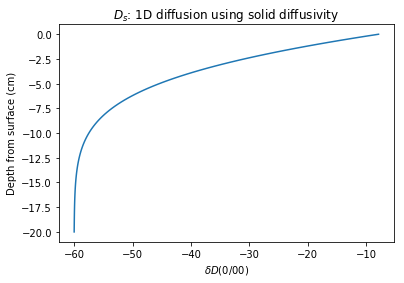

In [57]:
z = np.linspace(0, -20, nz)

plt.plot(delta, z)
plt.title('$D_s$: 1D diffusion using solid diffusivity')
plt.xlabel('$\delta D (0/00)$')
plt.ylabel('Depth from surface (cm)')

plt.show()

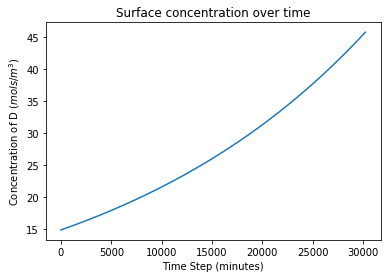

In [23]:
plt.plot(c_0)
plt.title('Surface concentration over time')
plt.ylabel('Concentration of D $(mols/m^3 )$')
plt.xlabel('Time Step (minutes)')
plt.show()

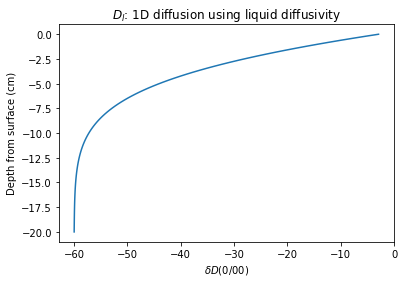

In [26]:
z = np.linspace(0, -20, nz)

plt.plot(delta, z)
plt.title('$D_l$: 1D diffusion using liquid diffusivity')
plt.xlabel('$\delta D (0/00)$')
plt.ylabel('Depth from surface (cm)')

plt.show()

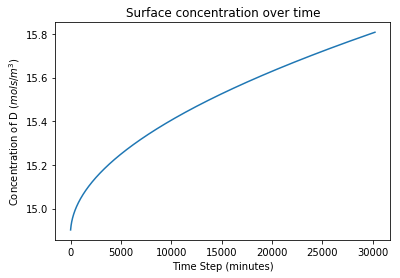

In [27]:
plt.plot(c_0)
plt.title('Surface concentration over time')
plt.ylabel('Concentration of D $(mols/m^3 )$')
plt.xlabel('Time Step (minutes)')
plt.show()